<a href="https://colab.research.google.com/github/natdebandi/migmobs_exploratory/blob/main/1_migration_data_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIGMOBS

## Migration data exploration

**Natalia Debandi**


'ARG', 'CHL', 'BOL', 'VEN'


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# prompt: open a csv file forma drive folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
# Filter for countries CHL and ARG
cuntries_latam = ['CHL', 'ARG','VEN','BOL','PAR','PER','ECU','URY','COL','BRA','SUR']

#target_iso3 country of destiny
countries_target = ['CHL', 'ARG']

#target_iso3 country of origin
countries_origin = ['BOL', 'VEN']


**(1) Stock migration RIKS-CRIS data**

from:
https://riks.cris.unu.edu/annual-bilateral-migration-data


1.1 inmigration_stock


La estimación que usa la base CRIS-UNU consiste en utilizar un modelo bayesiano state-space. En el núcleo del la relación demográfica entre el stock de migrantes, por un lado, y los flujos (brutos), las muertes y los nacimientos, por otro.
El modelo fusiona información dispersa en conjuntos de datos muy diferentes y completa las lagunas entre los años de referencia, que suelen ser múltiples en el caso de los datos migratorios.

https://cris.unu.edu/sites/cris.unu.edu/files/WP22.04%20-%20Standaert%20and%20Rayp_0.pdf

In [4]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/migration_imputed_RIKS_dec2021.csv'

df_riks = pd.read_csv(file_path)
print(df_riks.head())

  iso_or               origin iso_des destination  year  stock  flow  inflow  \
0    AAB  Antigua and Barbuda     ABW       Aruba  1960     16   NaN     NaN   
1    AAB  Antigua and Barbuda     ABW       Aruba  1961     16   0.0     NaN   
2    AAB  Antigua and Barbuda     ABW       Aruba  1962     15  -1.0     NaN   
3    AAB  Antigua and Barbuda     ABW       Aruba  1963     15   0.0     NaN   
4    AAB  Antigua and Barbuda     ABW       Aruba  1964     15   0.0     NaN   

   outflow  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  


In [5]:
latam_mig_df = df_riks[(df_riks['iso_des'].isin(cuntries_latam))]
print(latam_mig_df.head())

    iso_or               origin iso_des destination  year  stock  flow  \
436    AAB  Antigua and Barbuda     ARG   Argentina  1960      0   0.0   
437    AAB  Antigua and Barbuda     ARG   Argentina  1961      0   0.0   
438    AAB  Antigua and Barbuda     ARG   Argentina  1962      0   0.0   
439    AAB  Antigua and Barbuda     ARG   Argentina  1963      0   0.0   
440    AAB  Antigua and Barbuda     ARG   Argentina  1964      0   0.0   

     inflow  outflow  
436     NaN      NaN  
437     NaN      NaN  
438     NaN      NaN  
439     NaN      NaN  
440     NaN      NaN  


In [6]:
inmigration_df = latam_mig_df.groupby(['year', 'iso_des'])['stock'].sum().reset_index()
inmigration_df

,year,iso_des,stock
0,1960,ARG,2683416
1,1960,BOL,43730
2,1960,BRA,1435511
3,1960,CHL,109563
4,1960,COL,62104
...,...,...,...
605,2020,ECU,710469
606,2020,PAR,165475
607,2020,PER,1219978
608,2020,SUR,28048


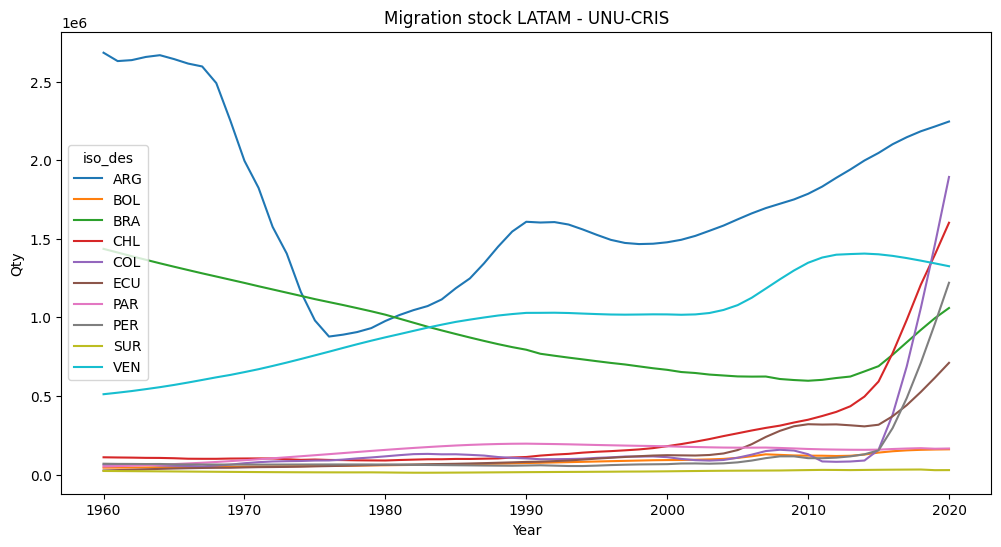

In [7]:

title_plot="Migration stock LATAM - UNU-CRIS"
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='stock', hue='iso_des', data=inmigration_df)
plt.title(f'{title_plot}')
plt.xlabel('Year')
plt.ylabel('Qty')
plt.show()

Venezuela y Argentina mantienen hasta 2015 el mayor stock de migrantes de la región. Se observa como el stock se modifica de manera impresionante a partir de 2015. Esto se vincula definitivamente con la diáspora venezolana.

Sorprende mucho el "bajón" que se observa en los datos de Argentina. Este bajon (que coincide con la etapa de la dictadura Argentina) no se muestra en otros datos oficiales. Vamos a corroborarlo

In [8]:
years_to_filter = [1960, 1970, 1980, 1991, 2001, 2010]

filtered_df = inmigration_df[(inmigration_df['iso_des'] == 'ARG') & (inmigration_df['year'].isin(years_to_filter))]

print(filtered_df.head())


     year iso_des    stock
0    1960     ARG  2683416
100  1970     ARG  1995770
200  1980     ARG   976756
310  1991     ARG  1603133
410  2001     ARG  1493360


Data correction from offical data from CENSUS ARGENTINA

https://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S1405-74252016000300201



In [9]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/census_data_ARG.csv'

df_census = pd.read_csv(file_path)
print(df_census.head())

  country_code  year    value                indicator          fuente
0          ARG  1960  2604447  inmigration_stock_INDEC  INDEC - Census
1          ARG  1970  2210400  inmigration_stock_INDEC  INDEC - Census
2          ARG  1980  1912217  inmigration_stock_INDEC  INDEC - Census
3          ARG  1991  1628210  inmigration_stock_INDEC  INDEC - Census
4          ARG  2001  1531940  inmigration_stock_INDEC  INDEC - Census


In [10]:
census_data_migration = df_census[df_census['indicator'] == 'inmigration_stock_INDEC']
census_data_migration

,country_code,year,value,indicator,fuente
0,ARG,1960,2604447,inmigration_stock_INDEC,INDEC - Census
1,ARG,1970,2210400,inmigration_stock_INDEC,INDEC - Census
2,ARG,1980,1912217,inmigration_stock_INDEC,INDEC - Census
3,ARG,1991,1628210,inmigration_stock_INDEC,INDEC - Census
4,ARG,2001,1531940,inmigration_stock_INDEC,INDEC - Census
5,ARG,2010,1805957,inmigration_stock_INDEC,INDEC - Census
6,ARG,2022,1933463,inmigration_stock_INDEC,INDEC - Census


In [11]:
combined_df = pd.merge(census_data_migration, filtered_df, on='year', how='inner')
combined_df = combined_df.rename(columns={'value': 'census_data', 'stock': 'stock_CRIS'})
combined_df = combined_df[['country_code', 'year', 'census_data', 'stock_CRIS']]

combined_df

,country_code,year,census_data,stock_CRIS
0,ARG,1960,2604447,2683416
1,ARG,1970,2210400,1995770
2,ARG,1980,1912217,976756
3,ARG,1991,1628210,1603133
4,ARG,2001,1531940,1493360
5,ARG,2010,1805957,1785826


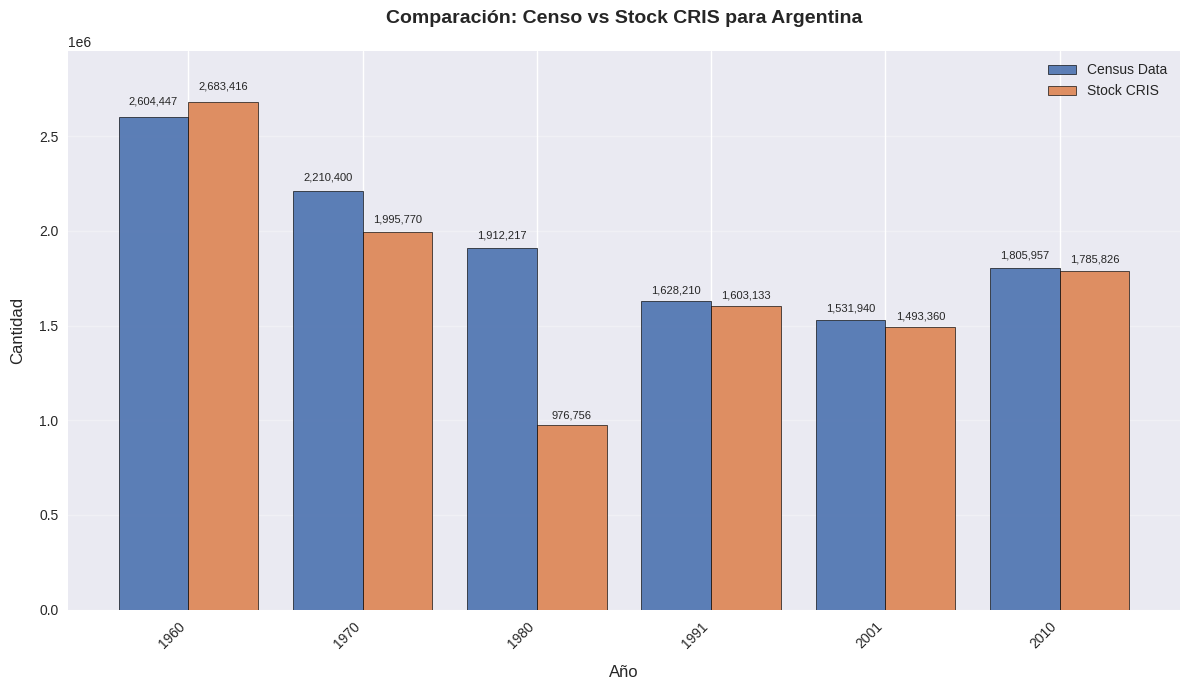

In [12]:

plt.figure(figsize=(12, 7))

# Configuración de estilo
plt.style.use('seaborn-v0_8')  # Usar un estilo más moderno
bar_width = 0.4
opacity = 0.9

# Colores accesibles y atractivos
color_census = '#4C72B0'  # Azul
color_stock = '#DD8452'    # Naranja

# Crear las barras
index = np.arange(len(combined_df['year']))
bars1 = plt.bar(index - bar_width/2, combined_df['census_data'], bar_width,
                alpha=opacity, color=color_census, label='Census Data',
                edgecolor='black', linewidth=0.5)
bars2 = plt.bar(index + bar_width/2, combined_df['stock_CRIS'], bar_width,
                alpha=opacity, color=color_stock, label='Stock CRIS',
                edgecolor='black', linewidth=0.5)

# Mejorar etiquetas y título
plt.xlabel('Año', fontsize=12, labelpad=10)
plt.ylabel('Cantidad', fontsize=12, labelpad=10)
plt.title('Comparación: Censo vs Stock CRIS para Argentina',
          fontsize=14, pad=20, fontweight='bold')

# Formatear ejes
plt.xticks(index, combined_df['year'], rotation=45 if len(index) > 5 else 0,
           ha='right' if len(index) > 5 else 'center', fontsize=10)
plt.yticks(fontsize=10)

# Añadir grid solo en el eje Y para mejor legibilidad
plt.grid(axis='y', alpha=0.3)

# Añadir leyenda en mejor posición
plt.legend(fontsize=10, framealpha=1)

# Añadir valores encima de las barras si el espacio lo permite
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height*1.02,
                f'{height:,.0f}',
                ha='center', va='bottom', fontsize=8)

add_labels(bars1)
add_labels(bars2)

# Ajustar márgenes
plt.margins(y=0.1)
plt.tight_layout()

plt.show()

La mayor diferencia entre estas fuentes está dada para 1980 donde los datos de CRIS bajan mucho. (habría que enviar consulta)

**1.2	Inmigration stock  - WORLD BANK API **


inmigration_stock_ONU

In [13]:
#pip install wbgapi

In [14]:
import wbgapi as wb

In [15]:
mig_stock_onu= wb.data.DataFrame('SM.POP.TOTL', ['ARG', 'CHL'], range(1960, 2022), labels=True)
mig_stock_onu = mig_stock_onu.reset_index()
mig_stock_onu

,economy,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
0,CHL,Chile,104805.0,NaN,NaN,NaN,NaN,97551.0,NaN,NaN,...,NaN,NaN,NaN,469436.0,NaN,NaN,NaN,NaN,NaN,NaN
1,ARG,Argentina,2601188.0,NaN,NaN,NaN,NaN,2409183.0,NaN,NaN,...,NaN,NaN,NaN,2086302.0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
mig_stock_onu = mig_stock_onu.melt(id_vars=['economy', 'Country'],
                    value_vars=[col for col in mig_stock_onu.columns if col.startswith('YR')],
                    var_name='year',
                    value_name='mig_stock')

# Limpiar la columna 'YEAR' eliminando el prefijo 'YR'
mig_stock_onu['year'] = mig_stock_onu['year'].str.replace('YR', '')
mig_stock_onu = mig_stock_onu.dropna(subset=['mig_stock'])
# Mostrar las primeras filas de la tabla transformada
print(mig_stock_onu.head())

   economy    Country  year  mig_stock
0      CHL      Chile  1960   104805.0
1      ARG  Argentina  1960  2601188.0
10     CHL      Chile  1965    97551.0
11     ARG  Argentina  1965  2409183.0
20     CHL      Chile  1970    90271.0


In [17]:
mig_stock_onu['year'] = mig_stock_onu['year'].astype(int)
mig_stock_onu['mig_stock'] = mig_stock_onu['mig_stock'].astype(int)
mig_stock_onu_arg = mig_stock_onu[mig_stock_onu['Country'] == 'Argentina']


In [18]:
# Merge combined_df with mig_stock_onu_arg on 'year'
combined_df = pd.merge(combined_df, mig_stock_onu_arg[['year', 'mig_stock']], on='year', how='left')
combined_df = combined_df.rename(columns={'mig_stock': 'stock_ONU'})
combined_df.to_csv('combined_df.csv', index=False)
combined_df


,country_code,year,census_data,stock_CRIS,stock_ONU
0,ARG,1960,2604447,2683416,2601188.0
1,ARG,1970,2210400,1995770,2219411.0
2,ARG,1980,1912217,976756,1920798.0
3,ARG,1991,1628210,1603133,NaN
4,ARG,2001,1531940,1493360,NaN
5,ARG,2010,1805957,1785826,1805957.0


** STOCK migration OIM API ***

OIM API Acces

https://www.migrationdataportal.org/

API documentation: https://www.migrationdataportal.org/handbooks/global-migration-data-portal-api-documentation

In [19]:
import requests
base_url = 'https://www.migrationdataportal.org/api/international-values?'
header_ = {'api-key': 'ab0b531fc309ca5080851f5f9101145d'}

In [20]:
params_ = {
     # Specifying the indicators.
    'indicator': 'stock_abs_',
    # Specifying the years for which data is requested.
    'year': '1960+2020'}

Problemas conectandome con el servidor. Los datos son similares al WORLD BANK.

In [21]:
filtered_inmigration_df = inmigration_df[inmigration_df['iso_des'].isin(countries_target)]
filtered_inmigration_df = filtered_inmigration_df.rename(columns={'iso_des': 'country_code'})
filtered_inmigration_df

,year,country_code,stock
0,1960,ARG,2683416
3,1960,CHL,109563
10,1961,ARG,2630230
13,1961,CHL,108385
20,1962,ARG,2636364
...,...,...,...
583,2018,CHL,1207629
590,2019,ARG,2214059
593,2019,CHL,1399076
600,2020,ARG,2245714


In [22]:
combined_df = pd.merge(filtered_inmigration_df, census_data_migration[['year', 'country_code','value']],on=['year', 'country_code'], how='outer')
combined_df

,year,country_code,stock,value
0,1960,ARG,2683416.0,2604447.0
1,1960,CHL,109563.0,NaN
2,1961,ARG,2630230.0,NaN
3,1961,CHL,108385.0,NaN
4,1962,ARG,2636364.0,NaN
...,...,...,...,...
118,2019,ARG,2214059.0,NaN
119,2019,CHL,1399076.0,NaN
120,2020,ARG,2245714.0,NaN
121,2020,CHL,1601702.0,NaN


Agrego los datos recientes de CHile

In [23]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/stock_chl_2021-2023.csv'

df_2022 = pd.read_csv(file_path)
print(df_2022.head())

   year country_code    value
0  2021          CHL  1630312
1  2022          CHL  1836137
2  2023          CHL  1918583


In [24]:
# prompt: agregar los datos de df_2022 a combined_df

combined_df = pd.concat([combined_df, df_2022], ignore_index=True)


In [25]:
combined_df

,year,country_code,stock,value
0,1960,ARG,2683416.0,2604447.0
1,1960,CHL,109563.0,NaN
2,1961,ARG,2630230.0,NaN
3,1961,CHL,108385.0,NaN
4,1962,ARG,2636364.0,NaN
...,...,...,...,...
121,2020,CHL,1601702.0,NaN
122,2022,ARG,NaN,1933463.0
123,2021,CHL,NaN,1630312.0
124,2022,CHL,NaN,1836137.0


In [26]:
combined_df = combined_df.rename(columns={'value': 'census_data', 'stock': 'stock_CRIS'})

combined_df = pd.merge(combined_df, mig_stock_onu_arg[['year', 'mig_stock']], on='year', how='left')
combined_df = combined_df.rename(columns={'mig_stock': 'stock_ONU'})
#combined_df.to_csv('combined_df.csv', index=False)
combined_df


,year,country_code,stock_CRIS,census_data,stock_ONU
0,1960,ARG,2683416.0,2604447.0,2601188.0
1,1960,CHL,109563.0,NaN,2601188.0
2,1961,ARG,2630230.0,NaN,NaN
3,1961,CHL,108385.0,NaN,NaN
4,1962,ARG,2636364.0,NaN,NaN
...,...,...,...,...,...
121,2020,CHL,1601702.0,NaN,NaN
122,2022,ARG,NaN,1933463.0,NaN
123,2021,CHL,NaN,1630312.0,NaN
124,2022,CHL,NaN,1836137.0,NaN


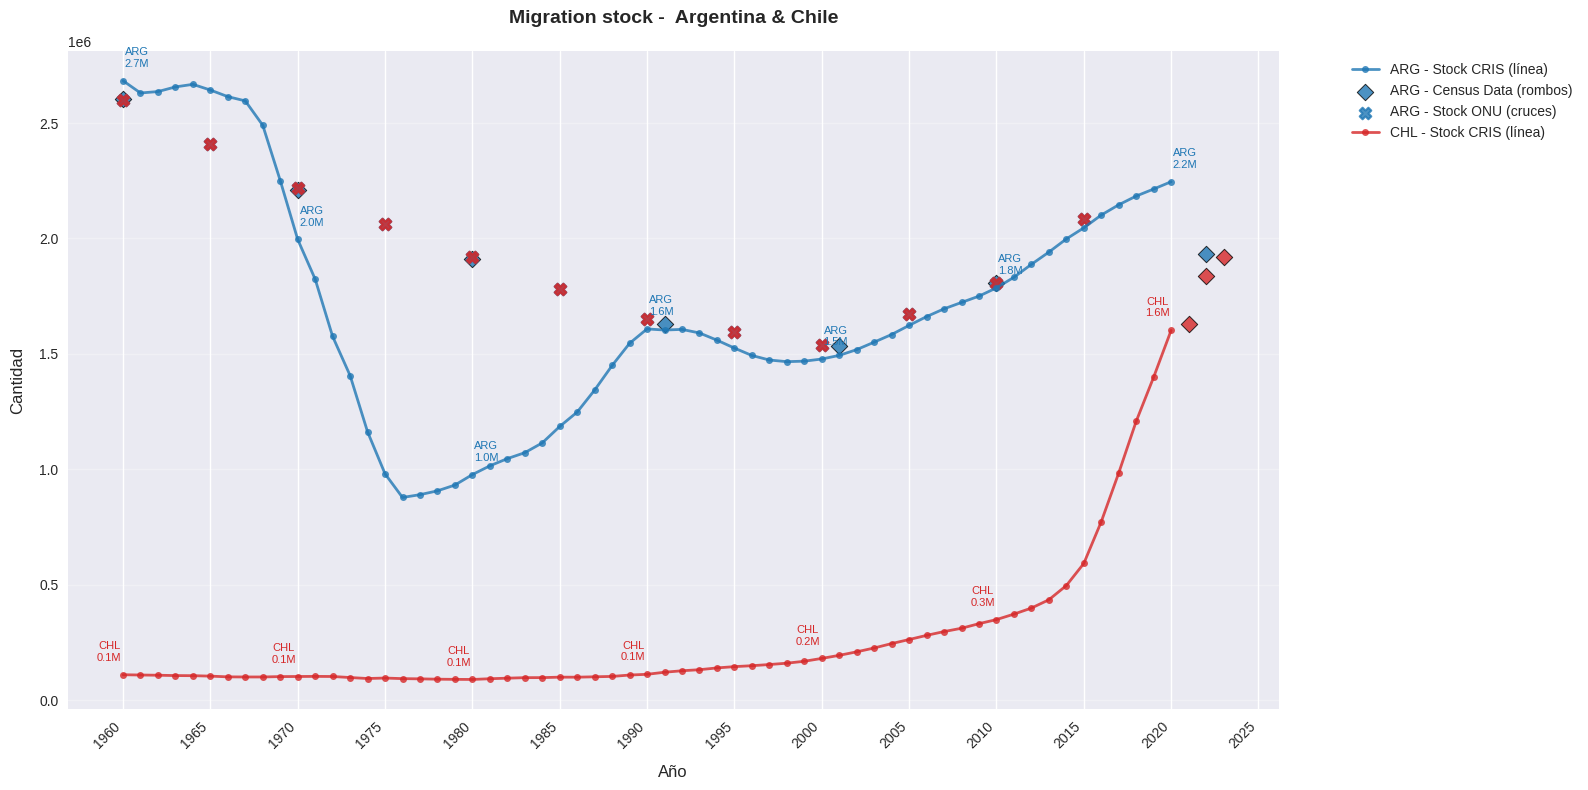

In [27]:
import matplotlib.ticker as ticker


# Configuración del estilo
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(16, 8))

# Asumiendo que tu DataFrame tiene una columna 'iso_des' con 'ARG' y 'CHL'
countries = combined_df['country_code'].unique()
colors = {'ARG': '#1f77b4', 'CHL': '#d62728'}  # Azul para ARG, Rojo para CHL
markers = {'census_data': 'D', 'stock_ONU': 'X'}  # Rombo para census, X para ONU

# Crear gráficos para cada país
for country in countries:
    country_df = combined_df[combined_df['country_code'] == country]

    # Línea para stock_CRIS
    plt.plot(country_df['year'], country_df['stock_CRIS'],
            color=colors[country], linewidth=2, marker='o', markersize=5,
            label=f'{country} - Stock CRIS (línea)', alpha=0.8)

    # Puntos para census_data (rombos)
    if 'census_data' in country_df.columns:
        plt.scatter(country_df['year'], country_df['census_data'],
                  color=colors[country], marker=markers['census_data'], s=70,
                  label=f'{country} - Census Data (rombos)' if country == countries[0] else "",
                  edgecolors='black', linewidths=0.7, alpha=0.8)

    # Puntos para stock_ONU (cruces)
    if 'stock_ONU' in country_df.columns:
        plt.scatter(country_df['year'], country_df['stock_ONU'],
                  color=colors[country], marker=markers['stock_ONU'], s=70, linewidth=1.5,
                  label=f'{country} - Stock ONU (cruces)' if country == countries[0] else "",
                  alpha=0.8)

# Personalización del gráfico
plt.title('Migration stock -  Argentina & Chile',
         fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Año', fontsize=12, labelpad=10)
plt.ylabel('Cantidad', fontsize=12, labelpad=10)
plt.grid(axis='y', alpha=0.3)

# Formatear ejes
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=45, ha='right')

# Manejar leyenda para evitar duplicados
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Eliminar duplicados
plt.legend(by_label.values(), by_label.keys(), fontsize=10, framealpha=1,
          bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir anotaciones para años clave (opcional)
key_years = [1960, 1970, 1980, 1990, 2000, 2010, 2020,2022]
for year in key_years:
    if year in combined_df['year'].values:
        for country in countries:
            country_data = combined_df[(combined_df['year'] == year) &
                                     (combined_df['country_code'] == country)]
            if not country_data.empty:
                y_val = country_data['stock_CRIS'].values[0]
                plt.annotate(f'{country}\n{y_val/1e6:.1f}M',
                            (year, y_val),
                            textcoords="offset points", xytext=(10 if country == "ARG" else -10, 10),
                            ha='center', fontsize=8, color=colors[country])

# Ajustar layout
plt.tight_layout()
plt.show()

Agreo manualmente las estimaciones de 2021-2023 del Censo Argentina oficial y de CHILE

In [28]:
#combined_df.to_csv('combined_df.csv', index=False)
combined_df

,year,country_code,stock_CRIS,census_data,stock_ONU
0,1960,ARG,2683416.0,2604447.0,2601188.0
1,1960,CHL,109563.0,NaN,2601188.0
2,1961,ARG,2630230.0,NaN,NaN
3,1961,CHL,108385.0,NaN,NaN
4,1962,ARG,2636364.0,NaN,NaN
...,...,...,...,...,...
121,2020,CHL,1601702.0,NaN,NaN
122,2022,ARG,NaN,1933463.0,NaN
123,2021,CHL,NaN,1630312.0,NaN
124,2022,CHL,NaN,1836137.0,NaN


Agrego una interpolación linear simple para los datos Censales

In [29]:
# Agrego el dato de ONU en la serie del censo para el 2015 para corregir la interpolación
combined_df.loc[combined_df['year'] == 2015, 'census_data'] = combined_df.loc[combined_df['year'] == 2015, 'stock_ONU'].fillna(mig_stock_onu_arg[mig_stock_onu_arg['year'] == 2015]['mig_stock'].iloc[0])


In [30]:
# Ordenar por país y año para asegurar correcta interpolación
combined_df = combined_df.sort_values(['country_code', 'year'])

# Solución garantizada
combined_df['census_data_interpolated'] = combined_df.groupby('country_code')['census_data'].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
).round()

print(combined_df[['year', 'country_code', 'census_data', 'census_data_interpolated']])

     year country_code  census_data  census_data_interpolated
0    1960          ARG    2604447.0                 2604447.0
2    1961          ARG          NaN                 2565042.0
4    1962          ARG          NaN                 2525638.0
6    1963          ARG          NaN                 2486233.0
8    1964          ARG          NaN                 2446828.0
..    ...          ...          ...                       ...
119  2019          CHL          NaN                 1782309.0
121  2020          CHL          NaN                 1706310.0
123  2021          CHL    1630312.0                 1630312.0
124  2022          CHL    1836137.0                 1836137.0
125  2023          CHL    1918583.0                 1918583.0

[126 rows x 4 columns]


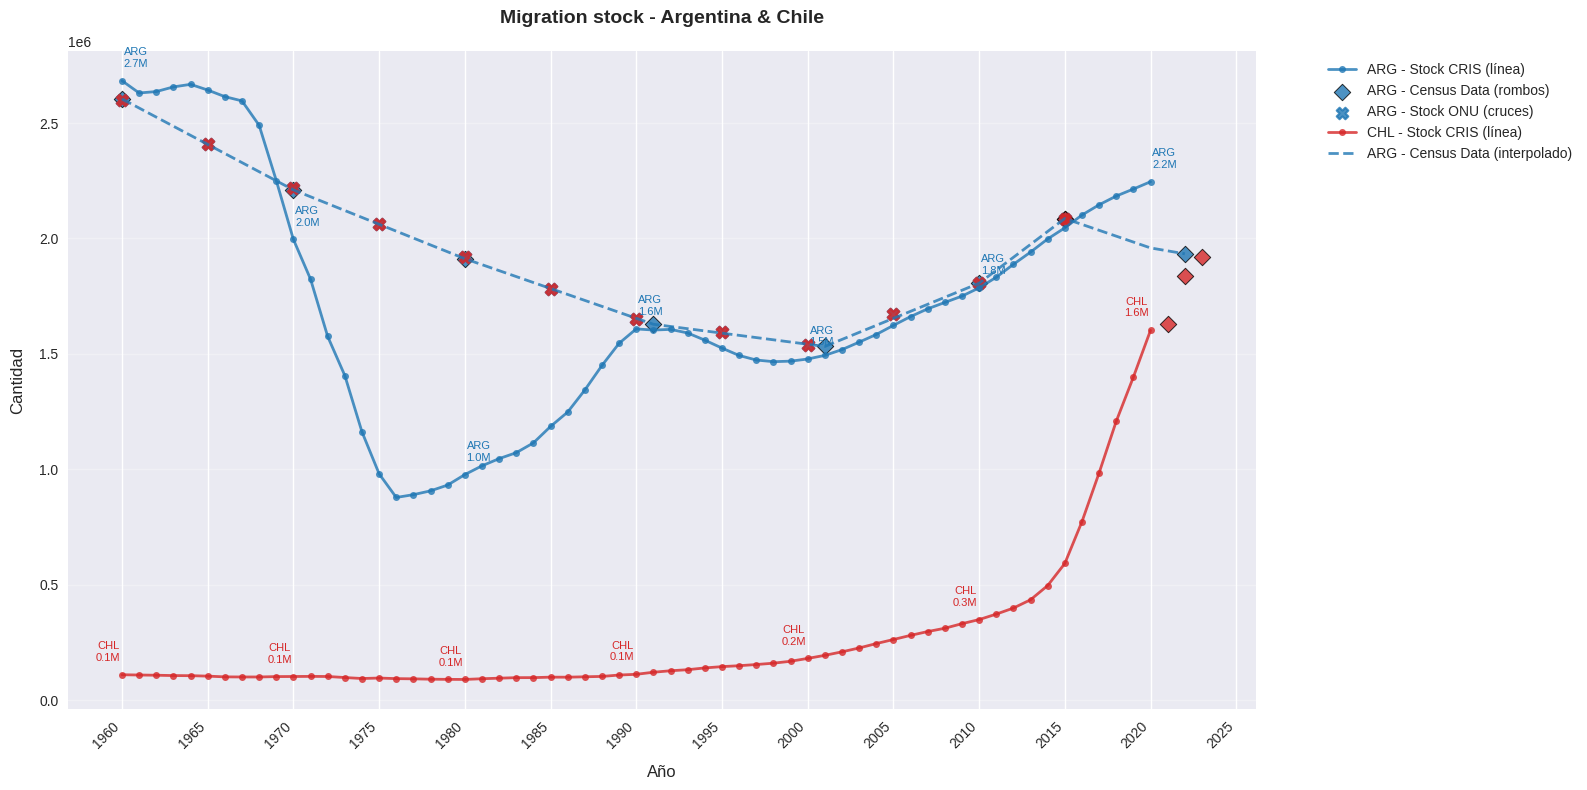

In [31]:
import matplotlib.ticker as ticker

# Configuración del estilo
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(16, 8))

# Asumiendo que tu DataFrame tiene una columna 'country_code' con 'ARG' y 'CHL'
countries = combined_df['country_code'].unique()
colors = {'ARG': '#1f77b4', 'CHL': '#d62728'}  # Azul para ARG, Rojo para CHL
markers = {'census_data': 'D', 'stock_ONU': 'X'}  # Rombo para census, X para ONU

# Crear gráficos para cada país
for country in countries:
    country_df = combined_df[combined_df['country_code'] == country]

    # Línea para stock_CRIS
    plt.plot(country_df['year'], country_df['stock_CRIS'],
            color=colors[country], linewidth=2, marker='o', markersize=5,
            label=f'{country} - Stock CRIS (línea)', alpha=0.8)

    # Puntos para census_data (rombos)
    if 'census_data' in country_df.columns:
        plt.scatter(country_df['year'], country_df['census_data'],
                  color=colors[country], marker=markers['census_data'], s=70,
                  label=f'{country} - Census Data (rombos)' if country == countries[0] else "",
                  edgecolors='black', linewidths=0.7, alpha=0.8)

    # Puntos para stock_ONU (cruces)
    if 'stock_ONU' in country_df.columns:
        plt.scatter(country_df['year'], country_df['stock_ONU'],
                  color=colors[country], marker=markers['stock_ONU'], s=70, linewidth=1.5,
                  label=f'{country} - Stock ONU (cruces)' if country == countries[0] else "",
                  alpha=0.8)

# AÑADIDO: Línea para census_data_interpolated solo para ARG
arg_df = combined_df[combined_df['country_code'] == 'ARG']
plt.plot(arg_df['year'], arg_df['census_data_interpolated'],
        color=colors['ARG'], linestyle='--', linewidth=2,
        label='ARG - Census Data (interpolado)', alpha=0.8)

# Personalización del gráfico
plt.title('Migration stock - Argentina & Chile',
         fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Año', fontsize=12, labelpad=10)
plt.ylabel('Cantidad', fontsize=12, labelpad=10)
plt.grid(axis='y', alpha=0.3)

# Formatear ejes
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=45, ha='right')

# Manejar leyenda para evitar duplicados
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Eliminar duplicados
plt.legend(by_label.values(), by_label.keys(), fontsize=10, framealpha=1,
          bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir anotaciones para años clave (opcional)
key_years = [1960, 1970, 1980, 1990, 2000, 2010, 2020, 2022]
for year in key_years:
    if year in combined_df['year'].values:
        for country in countries:
            country_data = combined_df[(combined_df['year'] == year) &
                                     (combined_df['country_code'] == country)]
            if not country_data.empty:
                y_val = country_data['stock_CRIS'].values[0]
                plt.annotate(f'{country}\n{y_val/1e6:.1f}M',
                            (year, y_val),
                            textcoords="offset points", xytext=(10 if country == "ARG" else -10, 10),
                            ha='center', fontsize=8, color=colors[country])

# Ajustar layout
plt.tight_layout()
plt.show()

Voy a corregir los datos de CRIS-ONU para Argentina entre algunos años, sustituyendo el valor por los datos estrapolados.

Lo haré solo para dos períodos

A- 1970-1989

B- 2016-2022

Sustituyo los datos de CHL también despues de 2021. Datos oficiales del censo



In [32]:
inmigration_df.head()

,year,iso_des,stock
0,1960,ARG,2683416
1,1960,BOL,43730
2,1960,BRA,1435511
3,1960,CHL,109563
4,1960,COL,62104


In [33]:
# Filter the combined_df for Argentina and years 1970-1989
arg_data = combined_df[(combined_df['country_code'] == 'ARG') & (combined_df['year'] >= 1970) & (combined_df['year'] <= 1989)]

# Iterate through the filtered data and update the 'stock' in inmigration_df
for index, row in arg_data.iterrows():
  inmigration_df.loc[(inmigration_df['iso_des'] == 'ARG') & (inmigration_df['year'] == row['year']), 'stock'] = row['census_data_interpolated']


In [34]:
# Filter the combined_df for Argentina and years 1970-1989
arg_data = combined_df[(combined_df['country_code'] == 'ARG') & (combined_df['year'] >= 2016) & (combined_df['year'] <= 2020)]

# Iterate through the filtered data and update the 'stock' in inmigration_df
for index, row in arg_data.iterrows():
  inmigration_df.loc[(inmigration_df['iso_des'] == 'ARG') & (inmigration_df['year'] == row['year']), 'stock'] = row['census_data_interpolated']

In [35]:
combined_df_2022 = combined_df[combined_df['year'] > 2020]
combined_df_2022 = combined_df_2022[['year', 'country_code', 'census_data_interpolated']]

In [36]:
combined_df_2022 = combined_df_2022.rename(columns={'country_code':'iso_des','census_data_interpolated': 'stock'})
inmigration_df = pd.concat([inmigration_df, combined_df_2022], ignore_index=True)


In [37]:
inmigration_df

,year,iso_des,stock
0,1960,ARG,2683416.0
1,1960,BOL,43730.0
2,1960,BRA,1435511.0
3,1960,CHL,109563.0
4,1960,COL,62104.0
...,...,...,...
609,2020,VEN,1325156.0
610,2022,ARG,1933463.0
611,2021,CHL,1630312.0
612,2022,CHL,1836137.0


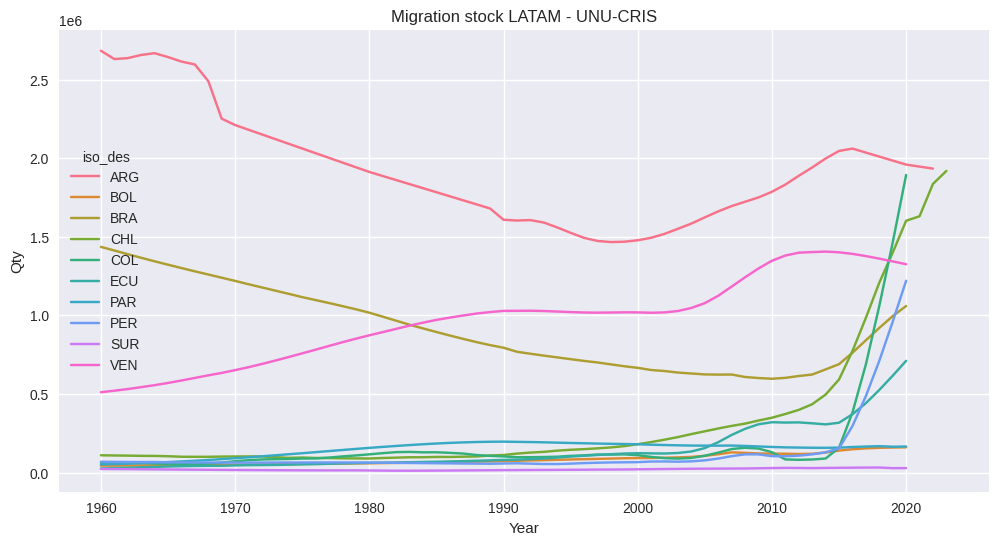

In [38]:
title_plot="Migration stock LATAM - UNU-CRIS"
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='stock', hue='iso_des', data=inmigration_df)
plt.title(f'{title_plot}')
plt.xlabel('Year')
plt.ylabel('Qty')
plt.show()

In [39]:
# prompt: guardar inmigration_df como csv

#inmigration_df.to_csv('inmigration_df.csv', index=False)


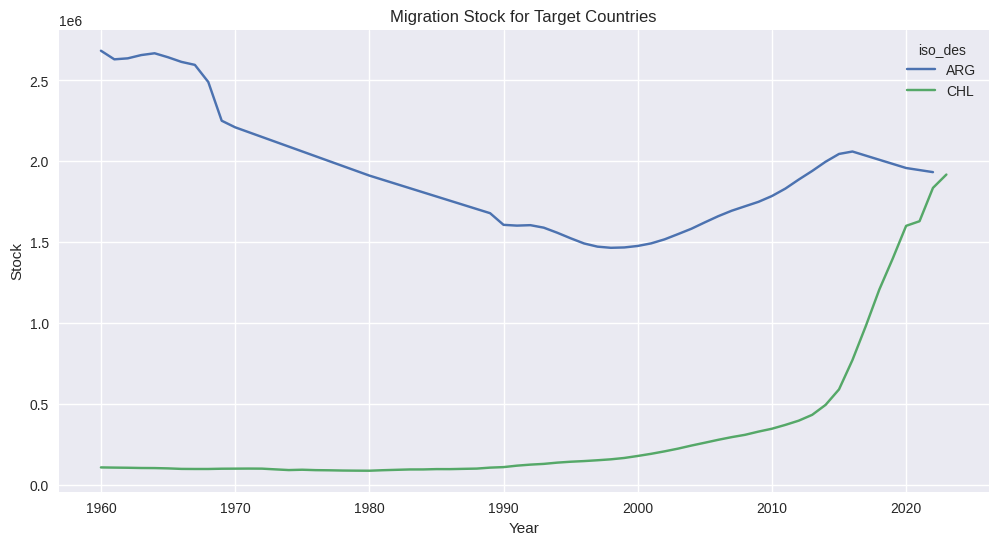

In [40]:
# prompt: Filtrar migration_df para countries_target y hacer un grafico de linea

# Filter the DataFrame
filtered_df = inmigration_df[inmigration_df['iso_des'].isin(countries_target)]

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='stock', hue='iso_des', data=filtered_df)
plt.title('Migration Stock for Target Countries')
plt.xlabel('Year')
plt.ylabel('Stock')
plt.show()


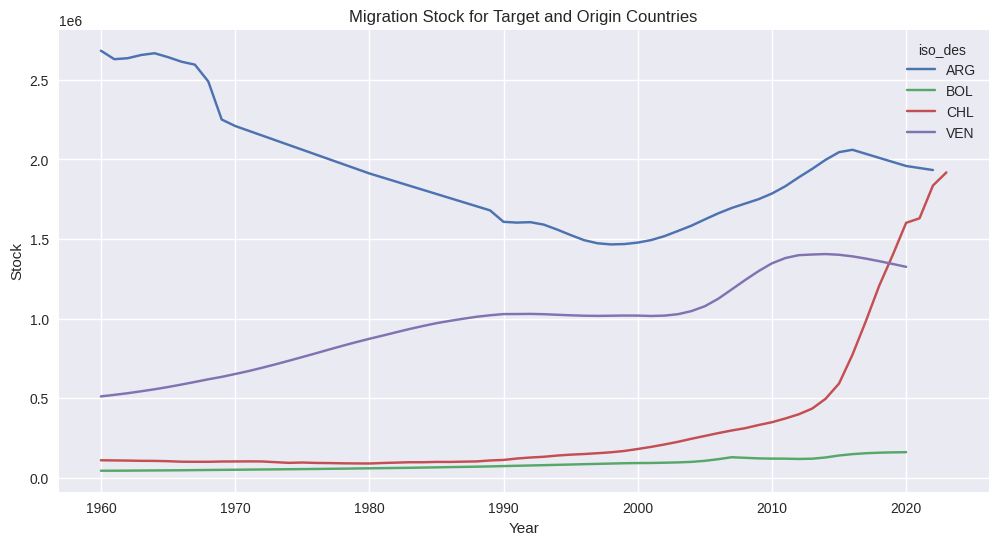

In [41]:
# Filter the DataFrame
filtered_df = inmigration_df[inmigration_df['iso_des'].isin(countries_target + countries_origin)]

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='stock', hue='iso_des', data=filtered_df)
plt.title('Migration Stock for Target and Origin Countries')
plt.xlabel('Year')
plt.ylabel('Stock')
plt.show()


## Flujos migratorios

**Abel database**

Abel, Guy (2019). Bilateral international migration flow estimates for 200 countries. figshare. Collection. https://doi.org/10.6084/m9.figshare.c.4470464


Revisar posibles librerias
https://github.com/guyabel/migest?tab=readme-ov-file


In [62]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/Abel_dataset/bilat_mig_type.csv'

df_abel = pd.read_csv(file_path)
print(df_abel.head())

   year0 orig dest     type  da_min_open  da_min_closed  da_pb_closed
0   1990  BDI  BDI  outward          0.0            0.0           0.0
1   1990  BDI  BDI   return          0.0            0.0           0.0
2   1990  BDI  BDI  transit          0.0            0.0           0.0
3   1990  COM  BDI  outward          0.0            0.0           0.0
4   1990  COM  BDI   return          0.0            0.0           0.0


In [ ]:
latam_df = mobility_df[
    mobility_df['iso3code_j'].isin(cuntries_latam) & mobility_df['iso3code_i'].isin(cuntries_latam)
]

mobility_df['year'] = mobility_df['year'].astype(int)